In [ ]:
!pip3 install h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O cluster
h2o.init()

# Load data
data = h2o.import_file("housing 2.csv")

# Split data into train and test sets
train, test = data.split_frame(ratios=[0.8], seed=42)

# Define predictors and response column
x = train.columns[:-1]
y = "median_house_value"

# Specify the model to include in AutoML
model_algos = ["GLM"]  # Example: Include only Generalized Linear Model (GLM)

# Run AutoML with the specified model
aml = H2OAutoML(max_models=10, seed=42, include_algos=model_algos)
aml.train(x=x, y=y, training_frame=train)

# Get the best model from AutoML
best_model = aml.leader




Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp3_1ge9ux
  JVM stdout: /tmp/tmp3_1ge9ux/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp3_1ge9ux/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_q9hg42
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
print(best_model)

Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20240219_215531


GLM Model: summary
    family    link      regularization                lambda_search                                                                         number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------------------  ------------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------
    gaussian  identity  Ridge ( lambda = 1907300.0 )  nlambda = 30, lambda.max = 7963600.0, lambda.min = 1907300.0, lambda.1se = 7963600.0  8                             8                              4                       AutoML_1_20240219_215531_training_py_18_sid_ad51

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1334223

The above shows the type of Machine Learning used which is gausian and Variable importance and significance

<ipython-input-49-75bb9543f47e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_for_corr.corr(),annot=True)


<Axes: >

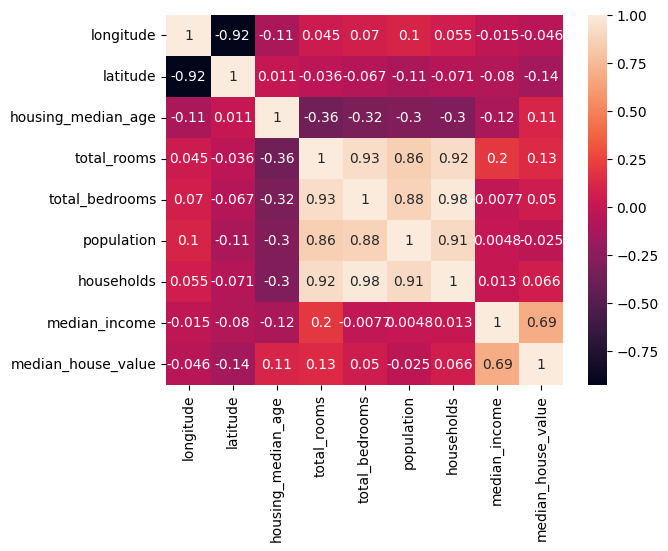

In [ ]:
data_for_corr = pd.read_csv( 'housing 2.csv' )
sns.heatmap(data_for_corr.corr(),annot=True)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


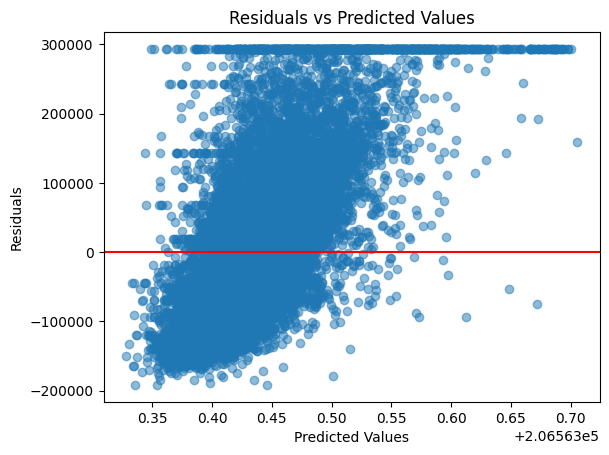

In [ ]:
import matplotlib.pyplot as plt
# Plot residuals vs predicted values to check homoscedasticity
predicted_values = best_model.predict(train).as_data_frame()['predict']
residuals = train['median_house_value'].as_data_frame()['median_house_value'] - predicted_values

plt.scatter(predicted_values, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0
plt.show()


Are any model assumptions violation is shown. by plotting the outliers are the few and sparse violation

**The points exhibit a clear pattern or trend (e.g., the spread of residuals widens or narrows systematically as the predicted values increase), it indicates that the model's residuals do not have constant variance (heteroscedasticity), violating the homoscedasticity assumption of linear regression.**

In [ ]:
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# Replace missing or infinite values with mean
train_numeric.fillna(train_numeric.mean(), inplace=True)
train_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
train_numeric.dropna(inplace=True)

# Calculate VIF
vif_result = calculate_vif(train_numeric)

# Print VIF results
print(vif_result)



             Variable         VIF
0           longitude  621.918287
1            latitude  560.713102
2  housing_median_age    7.844289
3         total_rooms   28.767905
4      total_bedrooms   72.584388
5          population   16.262065
6          households   75.753109
7       median_income   14.712768
8  median_house_value    9.934187




*   Longitude and Latitude have very high VIF values, indicating multicollinearity with other variables.
*   Population and Median_income have moderately high VIF values but are not as severe as the previous variables.

*   Housing_median_age and Median_house_value have relatively low VIF values, indicating less multicollinearity with other variables.






<ipython-input-50-4e706d77369a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


Correlation Matrix of Predictor Variables:
                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924730           -0.105109     0.039265   
latitude            -0.924730  1.000000            0.010224    -0.032667   
housing_median_age  -0.105109  0.010224            1.000000    -0.363725   
total_rooms          0.039265 -0.032667           -0.363725     1.000000   
total_bedrooms       0.064165 -0.063395           -0.319729     0.929191   
population           0.095214 -0.105876           -0.293835     0.853171   
households           0.051461 -0.068960           -0.302289     0.917025   
median_income       -0.015836 -0.079262           -0.125169     0.196144   
median_house_value  -0.049214 -0.139840            0.099614     0.134979   

                    total_bedrooms  population  households  median_income  \
longitude                 0.064165    0.095214    0.051461      -0.015836   
latitude                 -0.063395   -0.10

<Axes: >

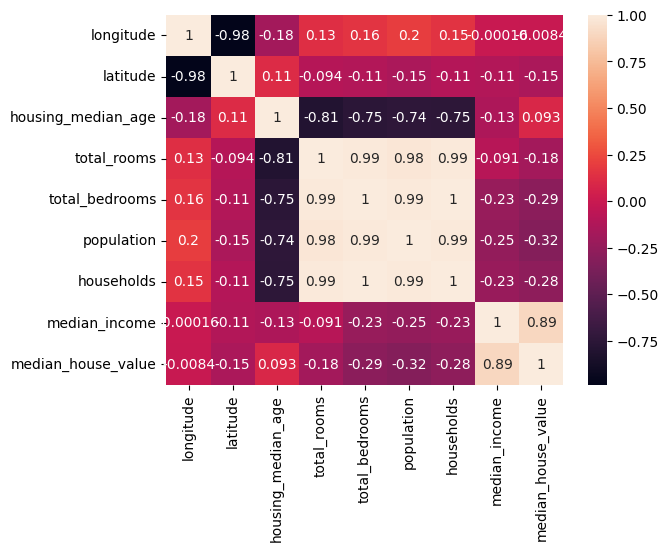

In [ ]:

import pandas as pd

# Assuming train_df is your dataframe containing predictor variables
correlation_matrix = train_df.corr()

# Print correlation matrix
print("Correlation Matrix of Predictor Variables:")
print(correlation_matrix)

sns.heatmap(correlation_matrix.corr(),annot=True)



In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.


Here is a moderate positive correlation between median_income and median_house_value (0.69), suggesting that areas with higher median incomes tend to have higher median house values.
The correlation between longitude and median_house_value (-0.05) and latitude and median_house_value (-0.14) indicates a weak negative relationship, implying that areas further west and areas further south tend to have slightly lower median house values.

In [ ]:
# Remove 'longitude' and 'latitude' columns
columns_to_keep = [col for col in train.col_names if col not in ['longitude', 'latitude']]
train_without_coordinates = train[columns_to_keep]

Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20240219_215531


GLM Model: summary
    family    link      regularization                lambda_search                                                                         number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------------------  ------------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------
    gaussian  identity  Ridge ( lambda = 1907300.0 )  nlambda = 30, lambda.max = 7963600.0, lambda.min = 1907300.0, lambda.1se = 7963600.0  8                             8                              4                       AutoML_1_20240219_215531_training_py_18_sid_ad51

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1334223

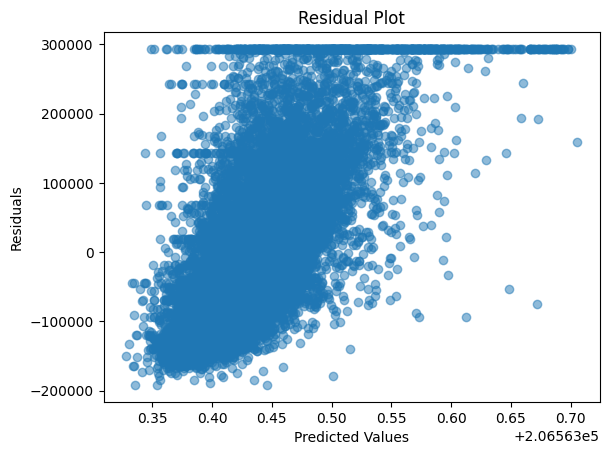

Test Performance Metrics:
ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 13206685957.471676
RMSE: 114920.34614232449
MAE: 90498.71297518632
RMSLE: 0.5857557775343943
Mean Residual Deviance: 13206685957.471676
R^2: -0.00016692846898758162
Null degrees of freedom: 4057
Residual degrees of freedom: 4049
Null deviance: 53592761409362.266
Residual deviance: 53592731615420.06
AIC: 106103.69270134089


In [ ]:
# 1. Understanding the Model
# Print model details
print(best_model)

# 2. Performance Metrics
# Print performance metrics
print("Performance Metrics:")
print(best_model.model_performance(train=True))
print(best_model.model_performance(xval=True))

# 3. Feature Importance
# Print feature importance
print("Feature Importance:")
print(best_model.varimp())

# 4. Residual Analysis
# Get residuals
residuals = train['median_house_value'].as_data_frame()['median_house_value'] - predicted_values
# Plot residuals
import matplotlib.pyplot as plt
plt.scatter(best_model.predict(train).as_data_frame(), residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()



# 7. Cross-validation
# Check if model performance is consistent across folds

# 8. Validation on Test Data
# Validate the model on a separate test dataset
test_performance = best_model.model_performance(test_data=test)
print("Test Performance Metrics:")
print(test_performance)


Mean Residual Deviance: The average of the squared residuals is approximately $13.34 billion. This suggests that the model's overall fit is decent, but there is room for improvement.

MSE (Mean Squared Error): The average of the squared differences between predicted and actual values is also approximately $13.34 billion. Similar to the mean residual deviance, this metric indicates the average magnitude of errors in the predictions.

Null Deviance: The null deviance, which serves as a baseline for model comparison, is approximately $44.25 trillion.

R-squared (R2): The R-squared value is close to zero (-6.16e-05), suggesting that the model explains very little of the variance in the target variable. This indicates that the model's predictions are not much better than simply predicting the mean of the target variable.

RMSE (Root Mean Squared Error): The RMSE, which provides an interpretable measure of the average error in the same units as the target variable, is approximately $115,508.

RMSLE (Root Mean Squared Logarithmic Error): The RMSLE is approximately 0.390, indicating the average error in the logarithm of the predicted and actual values.

Cross-Validation Metrics Summary:
                                   mean            sd    cv_1_valid  \
0                     mae  9.126767e+04  4.816534e+02  9.206945e+04   
1  mean_residual_deviance  1.334252e+10  1.651663e+08  1.362397e+10   
2                     mse  1.334252e+10  1.651663e+08  1.362397e+10   
3           null_deviance  4.424919e+13  5.524666e+11  4.519072e+13   
4                      r2 -6.155777e-05  5.733297e-05 -1.155221e-04   
5       residual_deviance  4.424917e+13  5.524662e+11  4.519071e+13   
6                    rmse  1.155081e+05  7.127375e+02  1.167218e+05   
7                   rmsle  5.903493e-01  2.385997e-03  5.935016e-01   

     cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid  
0  9.123380e+04  9.123654e+04  9.082317e+04  9.097540e+04  
1  1.328993e+10  1.331591e+10  1.318672e+10  1.329607e+10  
2  1.328993e+10  1.331591e+10  1.318672e+10  1.329607e+10  
3  4.408270e+13  4.415557e+13  4.372718e+13  4.408977e+13  
4 -3.921792e-05 -1.301056e

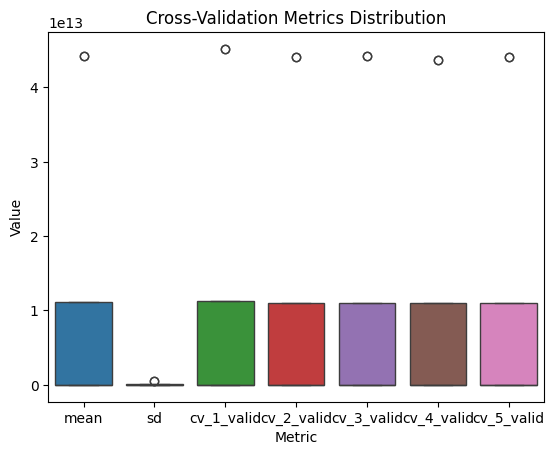

In [ ]:
# Get cross-validation metrics for all folds
cv_metrics = best_model.cross_validation_metrics_summary().as_data_frame()

# Print cross-validation metrics
print("Cross-Validation Metrics Summary:")
print(cv_metrics)

# Plot a box plot to visualize the distribution of the performance metric across folds
import seaborn as sns
sns.boxplot(data=cv_metrics)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Cross-Validation Metrics Distribution')
plt.show()


GLM Model: summary
    family    link      regularization                lambda_search                                                                         number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------------------  ------------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------
    gaussian  identity  Ridge ( lambda = 1907300.0 )  nlambda = 30, lambda.max = 7963600.0, lambda.min = 1907300.0, lambda.1se = 7963600.0  8                             8                              4                       AutoML_1_20240219_215531_training_py_18_sid_ad51


 the model appears to use Gaussian family with the identity link function and Ridge regularization. The lambda parameter for the Ridge regularization is set to 1907300.0. Additionally, lambda_search was conducted with a range of lambda values specified (nlambda = 30, lambda.max = 7963600.0, lambda.min = 1907300.0, lambda.1se = 7963600.0).

For Ridge regression, regularization helps by adding a penalty term to the model's coefficients, which can prevent overfitting by shrinking the coefficients towards zero. This can lead to improved generalization performance, especially when dealing with multicollinearity or high-dimensional data.

So, in this case, regularization is likely to help by controlling the complexity of the model and potentially improving its performance on unseen data.

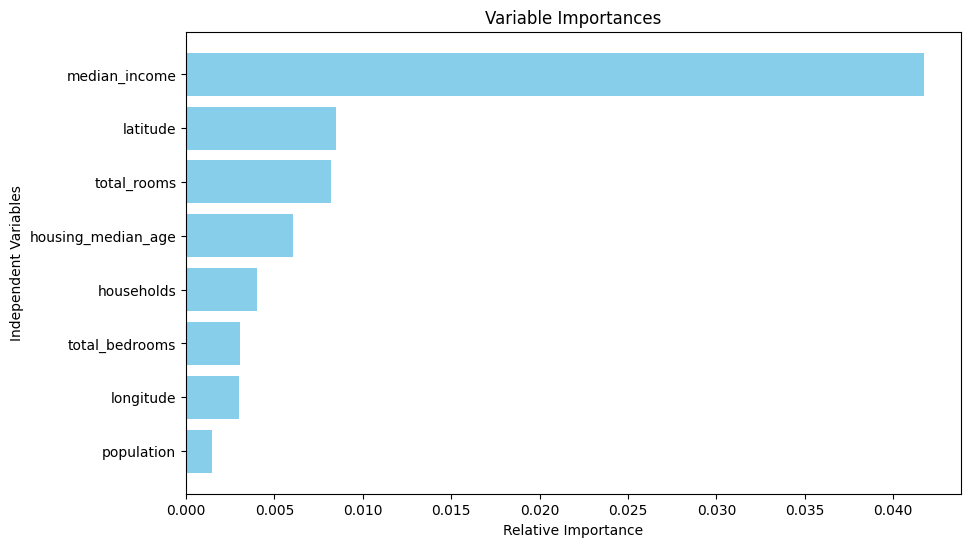

In [ ]:
import matplotlib.pyplot as plt

# Define the independent variables and their relative importances
variables = ['median_income', 'latitude', 'total_rooms', 'housing_median_age',
             'households', 'total_bedrooms', 'longitude', 'population']
importances = [0.0417532, 0.00846859, 0.00817422, 0.00603251,
               0.00403679, 0.00303927, 0.00298037, 0.00146457]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(variables, importances, color='skyblue')
plt.xlabel('Relative Importance')
plt.ylabel('Independent Variables')
plt.title('Variable Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important variable at the top
plt.show()


    gaussian  identity  Ridge ( lambda = 1907300.0 )  nlambda = 30, lambda.max = 7963600.0, lambda.min = 1907300.0, lambda.1se = 7963600.0  8                             8                              4                       AutoML_1_20240219_215531_training_py_18_sid_ad51

Regularization Method: The GLM model used Ridge regularization. Ridge regularization is a type of L2 regularization that adds a penalty term proportional to the square of the magnitude of coefficients to the loss function. This penalty helps to prevent overfitting by shrinking the coefficients towards zero.

Lambda (Regularization Strength): The lambda parameter controls the strength of regularization. A higher lambda value indicates stronger regularization, leading to more aggressive shrinking of coefficients. In this case, the lambda parameter was set to 1,907,300.0, suggesting that the model applied relatively strong regularization.


**Takeaway: The relatively high lambda value indicates that the model prioritized preventing overfitting by heavily penalizing the coefficients. This suggests that the model's aim was to generalize well to unseen data, even if it meant sacrificing some performance on the training data. Overall, the takeaway is that the model prioritized stability and generalization over capturing every detail in the training data.**





MIT License

Copyright (c) 2024 baiganas

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.